<a href="https://colab.research.google.com/github/busgandy/Global-AI-Hub/blob/main/Lesson%205%20(13-11-20)/Project%202/19-11-2020%20ML%20Course%20Nigeria%20Project%20'Busayo%20Olushola'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Busayo Olushola</h2>

# Data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Read csv
data = pd.read_csv("https://github.com/busgandy/Global-AI-Hub/blob/main/Lesson%205%20(13-11-20)/Project%202/Data/winequality.csv?raw=trie")
display(data)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Describe our data for each feature and use .info() for get information about our dataset

In [ ]:
print("\nThe Data Description: \n")
data.describe()


The Data Description: 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print("\nColumns and Data Information: \n")
data.info()


Columns and Data Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.shape

(1599, 12)

# Analyse missing values

In [ ]:
print("\nNumber of missing values: \n")
data.isna().sum()


Number of missing values: 



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
# Checking for the sum of nan values in the dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Checking for the sum of unknown values in the dataset

data.apply(lambda x: x.isin(['?'])).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Correlation of the features

# Exploratory Data Analysis

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Our label Distribution (countplot)


Text(0.5, 1.0, 'Distribution of Wine Quality')

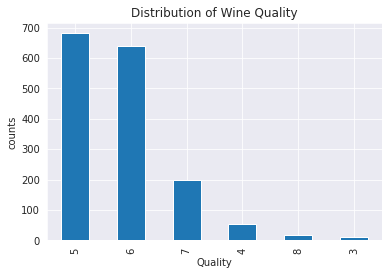

In [ ]:
data["quality"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Quality')
plt.title("Distribution of Wine Quality")

This shows that the model would perform well on both 5 and 6 wine quality

# Example EDA (distplot)


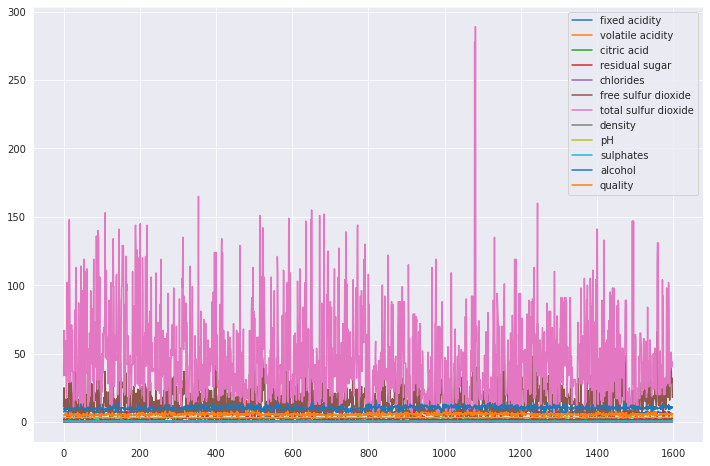

In [ ]:
data.plot(figsize=(12,8))

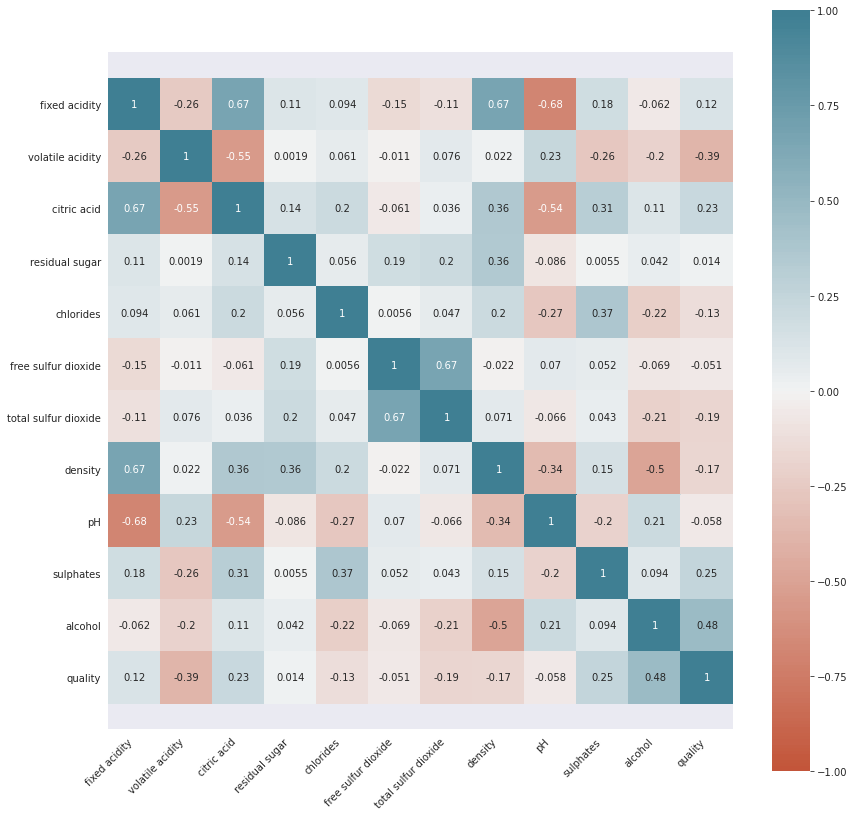

In [ ]:
import seaborn as sns
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

Text(0, 0.5, 'counts')

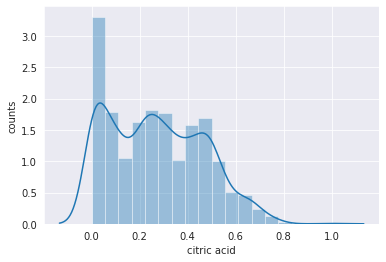

In [ ]:
sns.distplot(data["citric acid"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

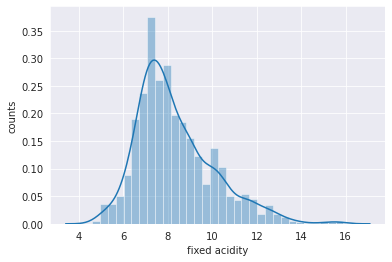

In [ ]:
sns.distplot(data["fixed acidity"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

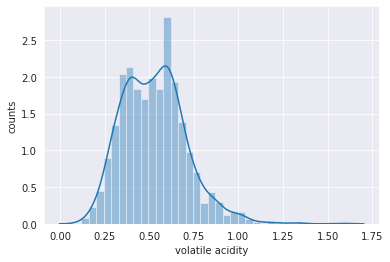

In [ ]:
sns.distplot(data["volatile acidity"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

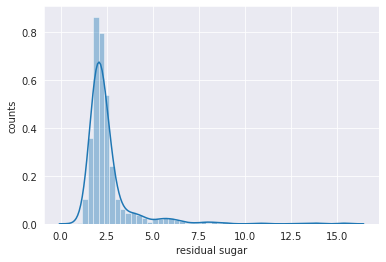

In [ ]:
sns.distplot(data["residual sugar"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

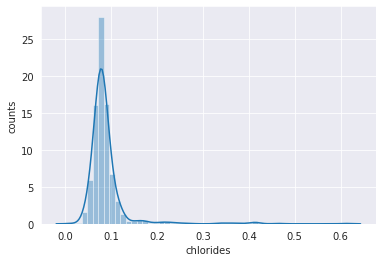

In [ ]:
sns.distplot(data["chlorides"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

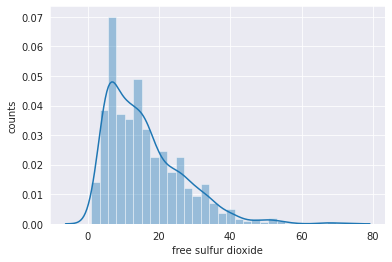

In [ ]:
sns.distplot(data["free sulfur dioxide"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

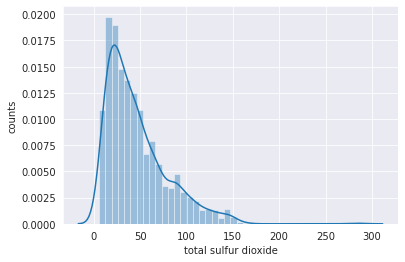

In [ ]:
sns.distplot(data["total sulfur dioxide"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

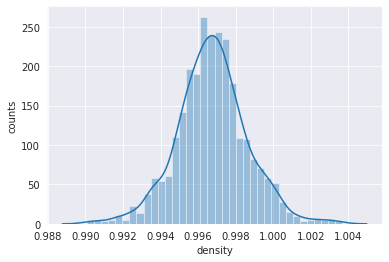

In [ ]:
sns.distplot(data["density"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

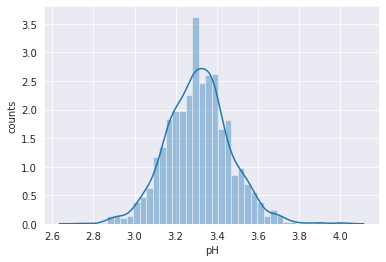

In [ ]:
sns.distplot(data["pH"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

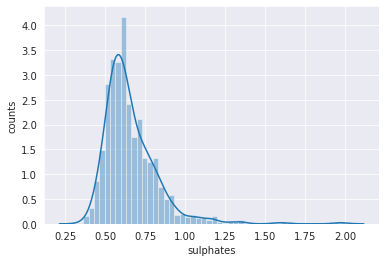

In [ ]:
sns.distplot(data["sulphates"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

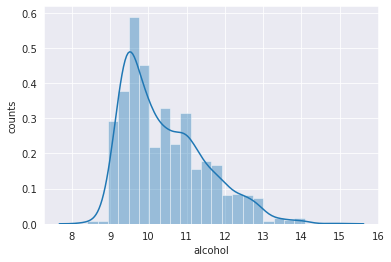

In [ ]:
sns.distplot(data["alcohol"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

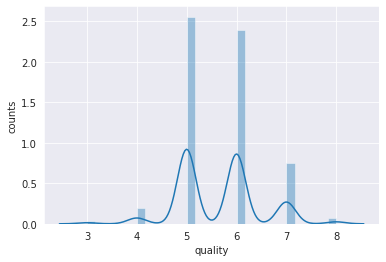

In [ ]:
sns.distplot(data["quality"])
plt.ylabel("counts")

From the EDA analysis, it shows that the dataset are not normlly distributed (contains outliers), hence, there is need to remove the outliers

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)



1.   Are there any duplicated values?



In [ ]:
data.duplicated().sum()

240

> Yes, there are duplicated values in the dataset



This shows that there are 240 number of duplicated values in the dataset

Duplicate inputs result in some distribution across your output and thus you need to retain that distribution. In this case removing examples is highly destructive and must be avoided.

2.   Do we need to do feature scaling?





> Yes, we need to do feature scaling because of the outliers in the dataset














In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z



array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [ ]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)


148

In [ ]:
def view(data):
    display(data)

Dataset before removing outliers

In [ ]:
view(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data_new = data.drop(outliers,axis = 0).reset_index(drop = True)

Dataset after removing outliers

In [ ]:
view(data_new)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


3.   Do we need to generate new features?





> Yes, we need to generate new features by scaling the dataset due to the varying ranges of the dataset



Scaling and standardizing can help features arrive in more digestible form for these algorithms.

These features can be used to improve the performance of machine learning algorithms.

Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
df = std.fit_transform(data_new.drop(columns = ["quality"]))

In [ ]:
df

array([[-0.55292997,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.63645843, -0.99985592],
       [-0.3099004 ,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.2883529 , -0.6081737 ],
       [-0.3099004 ,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.05715007, -0.6081737 ],
       ...,
       [-1.22126131, -0.07686519, -0.70929993, ...,  0.73781138,
         0.82782618,  0.56687296],
       [-1.46429088,  0.72445139, -0.76169222, ...,  1.80128587,
         0.51955574, -0.21649148],
       [-1.40353349, -1.26400088,  1.07203802, ...,  0.52511649,
         0.13421768,  0.56687296]])

In [ ]:
data_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df1 = pd.DataFrame(columns = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'), data =df)

Dataset before scaling

In [ ]:
view(data_new)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Dataset after scaling

In [ ]:
view(df1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,1.801286,0.519556,-0.216491


In [ ]:
def ballpark(data):
  return data.plot(figsize=(12,8))

Plot before removing outliers

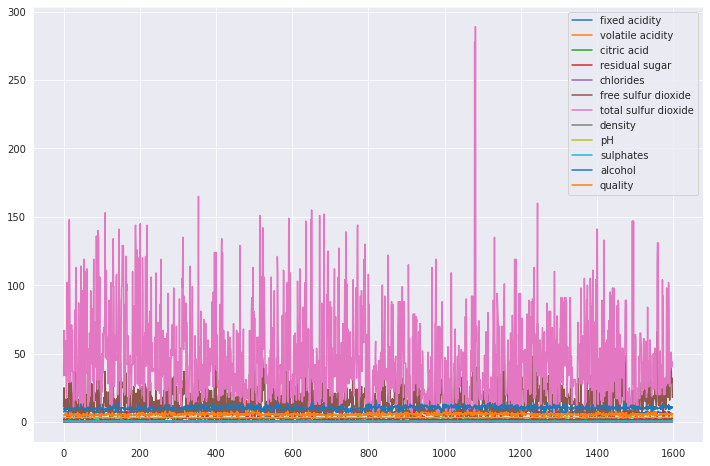

In [ ]:
ballpark(data)

Plot before scaling after removing outliers

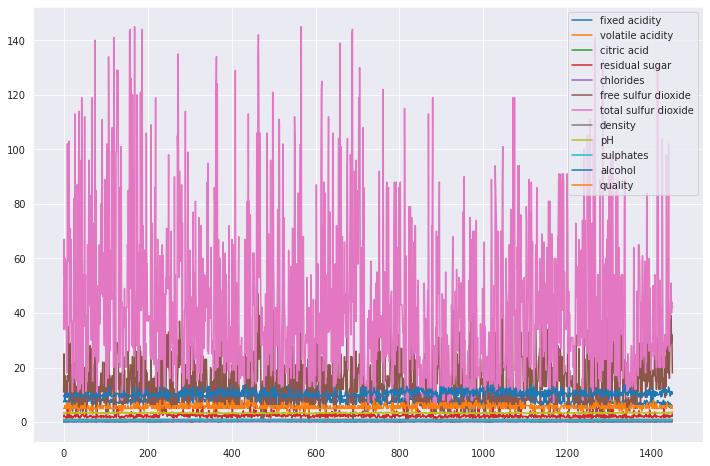

In [ ]:
ballpark(data_new)

Plot after scaling and removing outliers

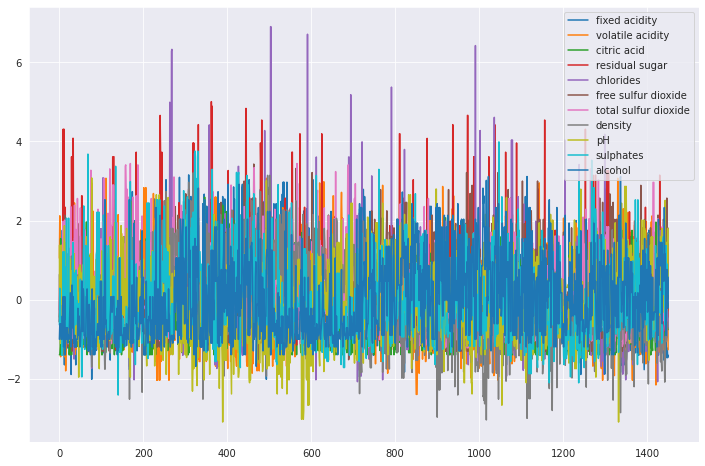

In [ ]:
ballpark(df1)

In [ ]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
def distribution(df1, title):
  fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))
  ax1.set_title(title)

  sns.kdeplot(df1['fixed acidity'], ax=ax1)
  sns.kdeplot(df1['volatile acidity'], ax=ax1)
  sns.kdeplot(df1['citric acid'], ax=ax1)
  sns.kdeplot(df1['residual sugar'], ax=ax1)
  sns.kdeplot(df1['chlorides'], ax=ax1)
  sns.kdeplot(df1['free sulfur dioxide'], ax=ax1)
  sns.kdeplot(df1['total sulfur dioxide'], ax=ax1)
  sns.kdeplot(df1['density'], ax=ax1)
  sns.kdeplot(df1['pH'], ax=ax1)
  sns.kdeplot(df1['sulphates'], ax=ax1)
  sns.kdeplot(df1['alcohol'], ax=ax1);

Original Distribution

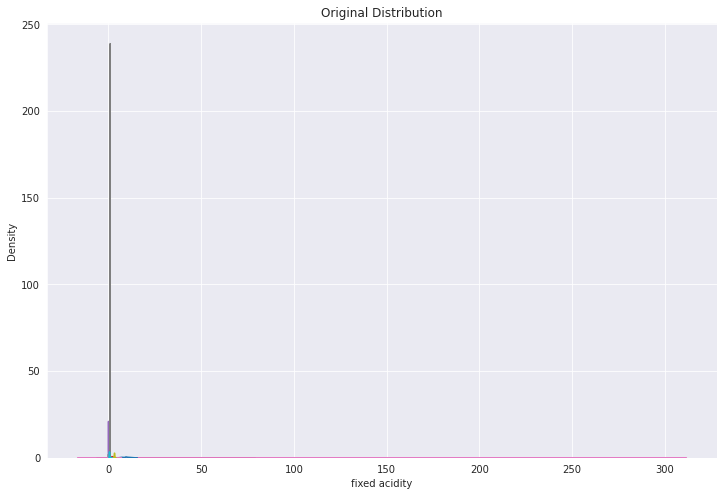

In [ ]:
distribution(data, "Original Distribution")

Distribution after removing outliers

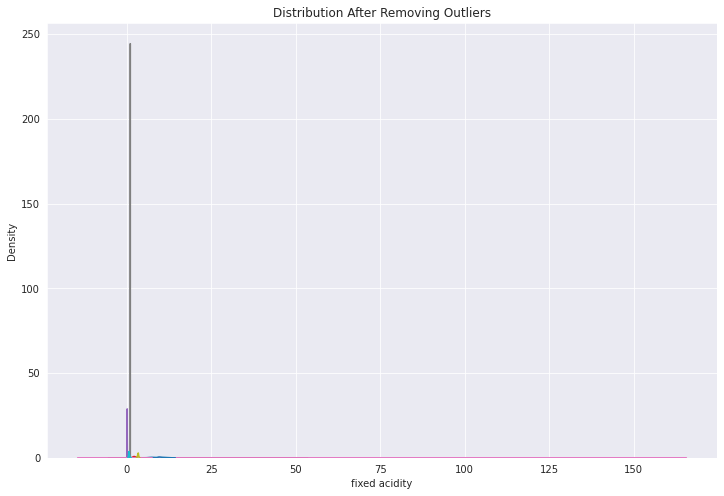

In [ ]:
distribution(data_new, "Distribution After Removing Outliers")

Distribution after StandardScaler Feature Selection

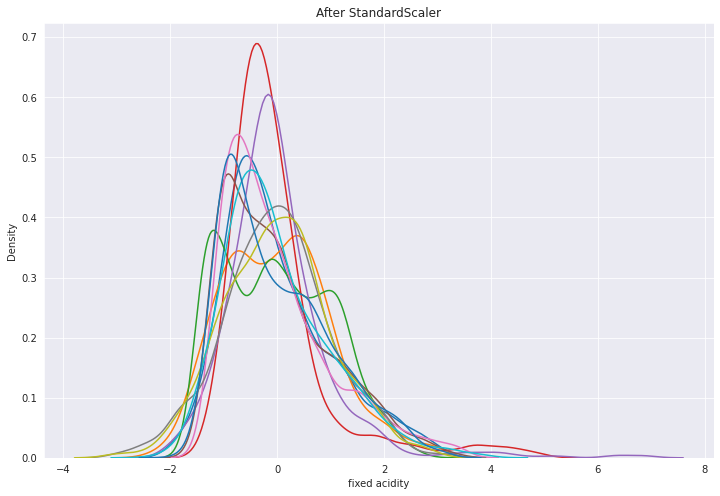

In [ ]:
distribution(df1, "After StandardScaler")

In [ ]:
df1["quality"] = data_new["quality"]

In [ ]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856,5
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174,5
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174,5
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174,6
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856,5




4.   Split Train and Test dataset. (0.7/0.3)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('quality', axis=1), df1['quality'], test_size=0.3, random_state=42)

In [ ]:
print(f" X_train: {X_train.shape}\n X_test: {X_test.shape}\n y_train: {y_train.shape}\n y_test: {y_test.shape}\n")

 X_train: (1015, 11)
 X_test: (436, 11)
 y_train: (1015,)
 y_test: (436,)



# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.



1.   Define Models


A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.


2.   Fit models.




**Using Decision Trees**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
print("Accuracy of train:",dtc.score(X_train, y_train))
print("Accuracy of test:",dtc.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.5802752293577982




3.   Evaluate models for both train and test dataset.



In [ ]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(X_test)

In [ ]:
def view_metrics(md):
    md.fit(X_train, y_train)
    print("Training accuracy:", md.score(X_train, y_train), '\n')
    print("Testing accuracy:", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(X_test)



4.   Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.


In [ ]:
dtc_metrics = model_testing(dtc)

Training accuracy: 1.0 

Testing accuracy: 0.5802752293577982 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.63      0.64      0.64       179
           6       0.57      0.60      0.58       179
           7       0.55      0.53      0.54        58
           8       0.00      0.00      0.00         5

    accuracy                           0.58       436
   macro avg       0.35      0.35      0.35       436
weighted avg       0.57      0.58      0.57       436



In [ ]:
dtc.predict_proba(X_train)

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
confusion_matrix(y_train, dtc.predict(X_train))

array([[ 32,   0,   0,   0,   0],
       [  0, 438,   0,   0,   0],
       [  0,   0, 407,   0,   0],
       [  0,   0,   0, 127,   0],
       [  0,   0,   0,   0,  11]])

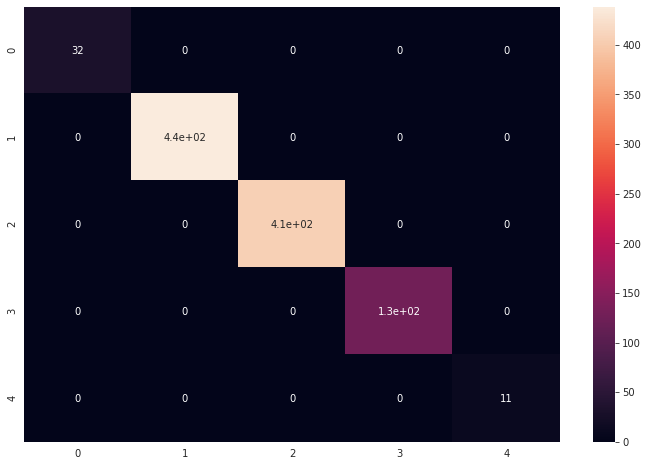

In [ ]:
c_matrix = confusion_matrix(y_train, dtc.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(c_matrix, annot=True)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, dtc_metrics)

0.6077981651376146

**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(solver="liblinear", C=10)

In [ ]:
log_prediction = view_metrics(log)

Training accuracy: 0.6206896551724138 

Testing accuracy: 0.5802752293577982 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.62      0.72      0.66       179
           6       0.54      0.59      0.56       179
           7       0.58      0.33      0.42        58
           8       0.00      0.00      0.00         5

    accuracy                           0.58       436
   macro avg       0.35      0.33      0.33       436
weighted avg       0.55      0.58      0.56       436



In [ ]:
mean_squared_error(y_test, log_prediction)

0.5412844036697247

In [ ]:
log.intercept_

array([-4.00546668, -0.44887237, -0.44203871, -3.01157053, -6.46842961])

In [ ]:
log.coef_

array([[ 1.11538023e+00,  6.79985853e-01, -9.59763290e-02,
         2.22463036e-01,  4.33719876e-02,  8.11927215e-02,
        -4.36366887e-01, -6.00127143e-01,  9.81739783e-01,
        -1.56823047e-01, -7.18346323e-01],
       [-4.59607953e-01,  2.56407160e-01,  2.31123495e-01,
        -2.32862920e-02, -3.71123514e-02, -2.82163028e-01,
         6.35760776e-01,  2.38671735e-01, -8.34355317e-02,
        -5.10373387e-01, -8.52461133e-01],
       [-3.68902738e-02, -1.95913708e-01, -2.58677206e-01,
        -2.56241327e-01,  9.26256958e-02,  3.02638945e-01,
        -4.79394337e-01,  3.17719968e-01,  9.59754348e-03,
         7.04752568e-02,  4.48428497e-01],
       [ 5.71129701e-01, -5.37208907e-01, -1.24260223e-01,
         4.31941477e-01, -1.16821733e-01,  1.24433586e-01,
        -5.16997393e-01, -5.65820338e-01, -1.56530278e-03,
         7.18514384e-01,  7.22863214e-01],
       [-1.18811530e+00,  2.72552175e-01,  5.30541030e-01,
        -1.56800220e-01, -6.67495644e-01,  2.86489613e-01,
  

In [ ]:
log.predict_proba(X_train)

array([[9.28295254e-03, 1.28857798e-01, 4.64532422e-01, 3.66505537e-01,
        3.08212913e-02],
       [6.38582550e-02, 5.45759020e-01, 3.76102970e-01, 1.40690234e-02,
        2.10730716e-04],
       [1.52634695e-02, 5.23658738e-01, 4.45785124e-01, 1.21399222e-02,
        3.15274681e-03],
       ...,
       [1.04836701e-03, 4.51743539e-02, 4.82640512e-01, 4.46991606e-01,
        2.41451611e-02],
       [2.29873740e-02, 1.52861890e-01, 7.13246450e-01, 1.10144001e-01,
        7.60284225e-04],
       [5.89397604e-03, 9.51466122e-02, 4.77707433e-01, 3.68851816e-01,
        5.24001622e-02]])

In [ ]:
confusion_matrix(y_train, log.predict(X_train))

array([[  0,  21,  11,   0,   0],
       [  0, 341,  95,   2,   0],
       [  0, 136, 254,  17,   0],
       [  0,  12,  80,  35,   0],
       [  0,   0,   8,   3,   0]])

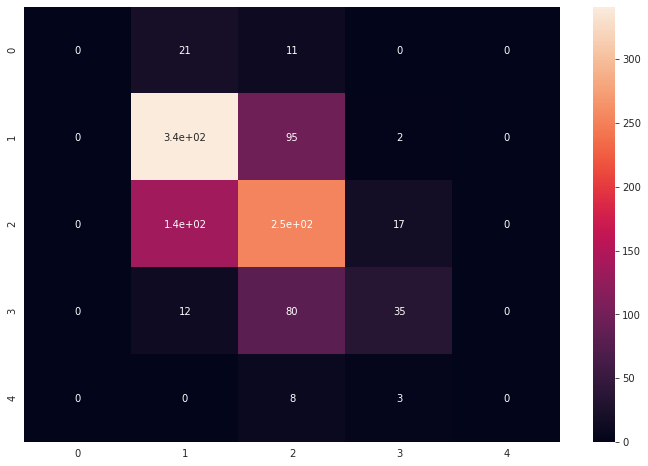

In [ ]:
c_matrix = confusion_matrix(y_train, log.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(c_matrix, annot=True)

Using GridSearchCV on the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5)

In [ ]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.001, 10, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsc.best_params_

{'C': 10}

In [ ]:
gsc.best_score_

0.6177339901477833

In [ ]:
gsc.score(X_test, y_test)

0.5802752293577982

Using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rd = RandomForestClassifier(n_estimators=200, max_depth=7, n_jobs=-1, criterion = "gini", random_state=1)

In [ ]:
rd.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rd_pred = model_testing(rd)

Training Accuracy:  0.8354679802955665 

Testing Accuracy:  0.6513761467889908 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.67      0.75      0.71       179
           6       0.62      0.68      0.65       179
           7       0.72      0.48      0.58        58
           8       0.00      0.00      0.00         5

    accuracy                           0.65       436
   macro avg       0.40      0.38      0.39       436
weighted avg       0.62      0.65      0.63       436



In [ ]:
mean_squared_error(y_test, rd_pred)

0.43577981651376146

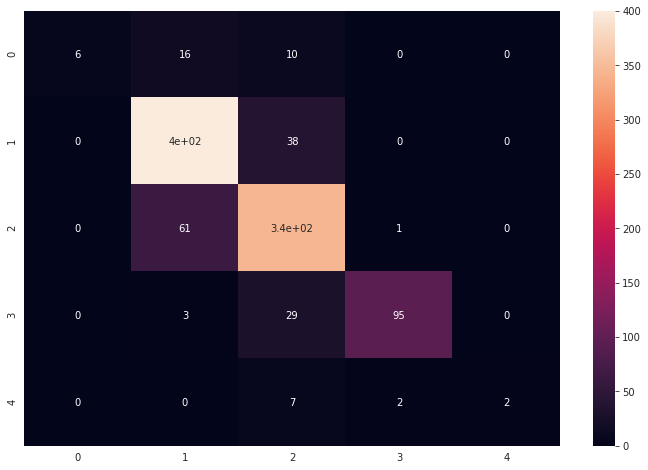

In [ ]:
c_matrix = confusion_matrix(y_train, rd.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(c_matrix, annot=True)

Using GridSearchCV to hypertune the model

In [ ]:
grid = GridSearchCV(rd, param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(10, 16), "n_estimators": range(100, 250, 5)}, cv=5)

In [ ]:

grid.fit(df1.drop('quality', axis=1), df1['quality'])

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 120}

In [ ]:
grid.best_score_

0.5975636923806139

In [ ]:
grid_cv = model_testing(grid)

Training accuracy: 0.9980295566502463 

Testing accuracy: 0.6697247706422018 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.69      0.76      0.73       179
           6       0.65      0.69      0.67       179
           7       0.64      0.55      0.59        58
           8       0.00      0.00      0.00         5

    accuracy                           0.67       436
   macro avg       0.40      0.40      0.40       436
weighted avg       0.64      0.67      0.65       436



In [ ]:
mean_squared_error(y_test, grid_cv)

0.4380733944954128

In [ ]:
confusion_matrix(y_train, grid.predict(X_train))

array([[ 31,   1,   0,   0,   0],
       [  0, 438,   0,   0,   0],
       [  0,   0, 407,   0,   0],
       [  0,   1,   0, 126,   0],
       [  0,   0,   0,   0,  11]])

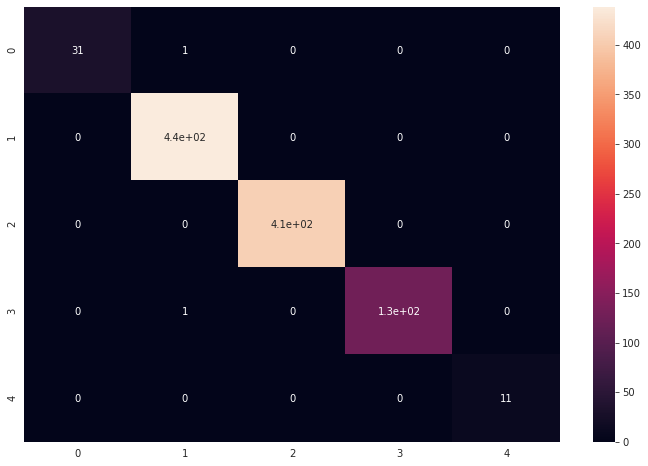

In [ ]:
c_matrix = confusion_matrix(y_train, grid.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(c_matrix, annot=True)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.



1.   Select the best performing model and write your comments about why choose this model.





> DecisionTreeClassifier



After hypertuning the RandomForestClassifier, I realised that the model performed very well. Hypertuning the DecisionTreeClassifier would go a long way in the performance of the model.


2.   Analyse results and make comment about how you can improve model.



Hypertuning the ecisionTreeClassifier would improve the performance of the model.